In [7]:
import os
from PIL import Image
import numpy as np
import pandas as pd
from pathlib import Path
from pathlib import PureWindowsPath
import re
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

import pathlib

Install Prerequisites

In [2]:
!pip install keras
!pip install tensorflow

    100% |████████████████████████████████| 109.2MB 12kB/s  eta 0:00:011
    100% |████████████████████████████████| 3.2MB 442kB/s  eta 0:00:01
    100% |████████████████████████████████| 491kB 3.1MB/s  eta 0:00:01


Download Dataset

In [5]:
!unzip -q /home/jupyter/labidub/Mouth_Images_50_100.zip

Write Dataset Paths from Raw

In [2]:
root_dir = Path("Mouth_Images_50_100")

In [3]:
data_df = pd.DataFrame(columns=['img_fname','speaker','index','sent_pattern',\
                                  'word','postfix'])
speaker_df = os.listdir("Mouth_Images_50_100")

for speaker_root in speaker_df:
    print(speaker_root)
    speaker_images = os.listdir(str(root_dir/speaker_root))
    speaker_img_df = pd.DataFrame(speaker_images,columns=["img_fname"])
    speaker_img_df["speaker"] = speaker_root
    speaker_img_df['index'] = speaker_img_df.apply(lambda x:\
                                x["img_fname"].split("_")[0],axis=1)
    speaker_img_df['sent_pattern'] = speaker_img_df.apply(lambda x:\
                                x["img_fname"].split("_")[1],axis=1)
    speaker_img_df['word'] = speaker_img_df.apply(lambda x:\
                                x["img_fname"].split("_")[2],axis=1)
    speaker_img_df['postfix'] = speaker_img_df.apply(lambda x:\
                                x["img_fname"].split("_")[3],axis=1)
    speaker_img_df['path'] = speaker_img_df.apply(lambda x:\
                            str(Path("Mouth_Images_50_100")/speaker_root/x["img_fname"]),axis=1)
    data_df = data_df.append(speaker_img_df)

In [96]:
ls

Mouth_Images_50_100/  speakers.txt
README.md             TCN+LSTM-3Channels-All_words.ipynb*


In [109]:
data_df.head()

,img_fname,index,path,postfix,sent_pattern,speaker,word
0,31040_swbm4p_m_4.jpg,31040,Mouth_Images_50_100/s27/31040_swbm4p_m_4.jpg,4.jpg,swbm4p,s27,m
1,25535_pbis4p_s_4.jpg,25535,Mouth_Images_50_100/s27/25535_pbis4p_s_4.jpg,4.jpg,pbis4p,s27,s
2,29676_pwbh7a_white_2.jpg,29676,Mouth_Images_50_100/s27/29676_pwbh7a_white_2.jpg,2.jpg,pwbh7a,s27,white
3,36454_lbwczp_please_6.jpg,36454,Mouth_Images_50_100/s27/36454_lbwczp_please_6.jpg,6.jpg,lbwczp,s27,please
4,25090_bgar4p_please_6.jpg,25090,Mouth_Images_50_100/s27/25090_bgar4p_please_6.jpg,6.jpg,bgar4p,s27,please


In [200]:
data_df.to_csv("dataset.csv")

In [166]:
word_df = data_df.groupby(['speaker','sent_pattern','word'],as_index=False)\
['speaker','sent_pattern','word']

In [203]:
random.seed(9001)
new_df = word_df.apply(lambda x: random.randint(0,4))

In [201]:
new_df.to_csv("dataset_fold.csv",header='speaker,sent_pattern,kfold')

In [225]:
new_df.head()

Read Dataset Pathfiles from CSV

In [4]:
new_df = pd.read_csv("dataset_fold.csv",names=['speaker','sent_pattern','word','kfold'],header=0)

In [8]:
new_df.head(2)

,speaker,sent_pattern,word,kfold
0,s10,bbab8n,at,2
1,s10,bbab8n,b,2


In [10]:
data_df = pd.read_csv("dataset.csv",names=['img_fname','index','path','postfix',\
                                          'sent_pattern','speaker','word'],header=0)

In [11]:
data_df.head(2)

,img_fname,index,path,postfix,sent_pattern,speaker,word
0,31040_swbm4p_m_4.jpg,31040,Mouth_Images_50_100/s27/31040_swbm4p_m_4.jpg,4.jpg,swbm4p,s27,m
1,25535_pbis4p_s_4.jpg,25535,Mouth_Images_50_100/s27/25535_pbis4p_s_4.jpg,4.jpg,pbis4p,s27,s


### Concatenate Images into Grid

In [109]:
new_df['merged_idx']= new_df.apply(lambda x:\
                                x["speaker"] + "_" + x['sent_pattern'] + "_" + x["word"],axis=1)

In [203]:
new_df.index.name = 'idx'
new_df.to_csv("dataset_fold_indexed.csv",header='speaker,sent_pattern,kfold,merged_idx')

In [42]:
temp_df = new_df[new_df['speaker']=='s27']
temp_df.head(5)

,speaker,sent_pattern,word,kfold
84000,s27,bbac6n,at,0
84001,s27,bbac6n,bin,0
84002,s27,bbac6n,blue,0
84003,s27,bbac6n,c,1
84004,s27,bbac6n,now,2


In [68]:
temp_df['merged_idx']= temp_df.apply(lambda x:\
                                x["speaker"] + "_" + x['sent_pattern'] + "_" + x["word"],axis=1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [202]:
data_df.index.name = 'idx'
data_df.to_csv("dataset_indexed.csv")

In [69]:
temp_df.head()

,speaker,sent_pattern,word,kfold,merged_idx
84000,s27,bbac6n,at,0,s27_bbac6n_at
84001,s27,bbac6n,bin,0,s27_bbac6n_bin
84002,s27,bbac6n,blue,0,s27_bbac6n_blue
84003,s27,bbac6n,c,1,s27_bbac6n_c
84004,s27,bbac6n,now,2,s27_bbac6n_now


In [70]:
temp_data_df = data_df.head(10)
temp_data_df.head(2)

,img_fname,index,path,postfix,sent_pattern,speaker,word
0,31040_swbm4p_m_4.jpg,31040,Mouth_Images_50_100/s27/31040_swbm4p_m_4.jpg,4.jpg,swbm4p,s27,m
1,25535_pbis4p_s_4.jpg,25535,Mouth_Images_50_100/s27/25535_pbis4p_s_4.jpg,4.jpg,pbis4p,s27,s


In [72]:
temp_data_df['merged_idx']= temp_data_df.apply(lambda x:\
                                x["speaker"] + "_" + x['sent_pattern'] + "_" + x["word"],axis=1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [73]:
temp_data_df.head()

,img_fname,index,path,postfix,sent_pattern,speaker,word,merged_idx
0,31040_swbm4p_m_4.jpg,31040,Mouth_Images_50_100/s27/31040_swbm4p_m_4.jpg,4.jpg,swbm4p,s27,m,s27_swbm4p_m
1,25535_pbis4p_s_4.jpg,25535,Mouth_Images_50_100/s27/25535_pbis4p_s_4.jpg,4.jpg,pbis4p,s27,s,s27_pbis4p_s
2,29676_pwbh7a_white_2.jpg,29676,Mouth_Images_50_100/s27/29676_pwbh7a_white_2.jpg,2.jpg,pwbh7a,s27,white,s27_pwbh7a_white
3,36454_lbwczp_please_6.jpg,36454,Mouth_Images_50_100/s27/36454_lbwczp_please_6.jpg,6.jpg,lbwczp,s27,please,s27_lbwczp_please
4,25090_bgar4p_please_6.jpg,25090,Mouth_Images_50_100/s27/25090_bgar4p_please_6.jpg,6.jpg,bgar4p,s27,please,s27_bgar4p_please


In [97]:
data_df['merged_idx']= data_df.apply(lambda x:\
                                x["speaker"] + "_" + x['sent_pattern'] + "_" + x["word"],axis=1)


In [100]:
temp_idx = temp_df.iloc[0]['merged_idx']
# temp_data_df[temp_data_df.merged_idx==temp_idx]
# print(temp_df[temp_df.merged_idx=='s27_pwbh7a_white'])
# print(temp_idx)
temp_images = data_df[data_df.merged_idx==temp_idx]
for img in temp_images['path']:
    print(img)


In [105]:
temp_images

,img_fname,index,path,postfix,sent_pattern,speaker,word,merged_idx
31669,21464_bbac6n_at_3.jpg,21464,Mouth_Images_50_100/s27/21464_bbac6n_at_3.jpg,3.jpg,bbac6n,s27,at,s27_bbac6n_at
36757,21463_bbac6n_at_3.jpg,21463,Mouth_Images_50_100/s27/21463_bbac6n_at_3.jpg,3.jpg,bbac6n,s27,at,s27_bbac6n_at


In [176]:
i = 0
temp_root = new_df.iloc[11]['merged_idx']

for imgpath in data_df[data_df.merged_idx==temp_root]['path']:
    print(imgpath)

Mouth_Images_50_100/s10/20520_bbab9s_soon_6.jpg
Mouth_Images_50_100/s10/20517_bbab9s_soon_6.jpg
Mouth_Images_50_100/s10/20524_bbab9s_soon_6.jpg
Mouth_Images_50_100/s10/20523_bbab9s_soon_6.jpg
Mouth_Images_50_100/s10/20522_bbab9s_soon_6.jpg
Mouth_Images_50_100/s10/20521_bbab9s_soon_6.jpg
Mouth_Images_50_100/s10/20518_bbab9s_soon_6.jpg
Mouth_Images_50_100/s10/20519_bbab9s_soon_6.jpg


In [177]:
temp_paths = data_df[data_df.merged_idx==temp_root]['path']


In [178]:
temp_paths.iloc[0]

'Mouth_Images_50_100/s10/20520_bbab9s_soon_6.jpg'

In [179]:
imgpath

'Mouth_Images_50_100/s10/20519_bbab9s_soon_6.jpg'

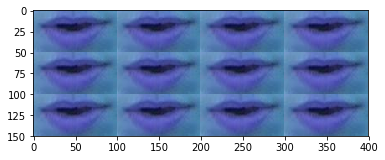

In [138]:

im1 = cv2.imread(imgpath)
def concat_tile(im_list_2d):
    return cv2.vconcat([cv2.hconcat(im_list_h) for im_list_h in im_list_2d])

im1_s = cv2.resize(im1, dsize=(0, 0), fx=1, fy=1)
im_tile = concat_tile([[im1_s, im1_s, im1_s, im1_s],
                       [im1_s, im1_s, im1_s, im1_s],
                       [im1_s, im1_s, im1_s, im1_s]])
# cv2.imwrite('data/dst/opencv_concat_tile.jpg', im_tile)
plt.imshow(im_tile)


In [139]:
temp_ims = [[im1_s, im1_s, im1_s, im1_s],
                       [im1_s, im1_s, im1_s, im1_s],
                       [im1_s, im1_s, im1_s, im1_s]]

In [147]:
len(temp_ims[0])

4

In [187]:
temp_paths = data_df[data_df.merged_idx==temp_root]['path'].sort_values("index",ascending=True)
n_path = len(temp_paths)

In [189]:
temp_paths.sort_values("index",ascending=True)

idx
10052    Mouth_Images_50_100/s10/20517_bbab9s_soon_6.jpg
31609    Mouth_Images_50_100/s10/20518_bbab9s_soon_6.jpg
32603    Mouth_Images_50_100/s10/20519_bbab9s_soon_6.jpg
3356     Mouth_Images_50_100/s10/20520_bbab9s_soon_6.jpg
31238    Mouth_Images_50_100/s10/20521_bbab9s_soon_6.jpg
23679    Mouth_Images_50_100/s10/20522_bbab9s_soon_6.jpg
21165    Mouth_Images_50_100/s10/20523_bbab9s_soon_6.jpg
11068    Mouth_Images_50_100/s10/20524_bbab9s_soon_6.jpg
Name: path, dtype: object

## Make Tile - Duplicate last frame til end

Mouth_Images_50_100/s10/20517_bbab9s_soon_6.jpg
Mouth_Images_50_100/s10/20518_bbab9s_soon_6.jpg
Mouth_Images_50_100/s10/20519_bbab9s_soon_6.jpg
Mouth_Images_50_100/s10/20520_bbab9s_soon_6.jpg
Mouth_Images_50_100/s10/20521_bbab9s_soon_6.jpg
Mouth_Images_50_100/s10/20522_bbab9s_soon_6.jpg
Mouth_Images_50_100/s10/20523_bbab9s_soon_6.jpg
Mouth_Images_50_100/s10/20524_bbab9s_soon_6.jpg


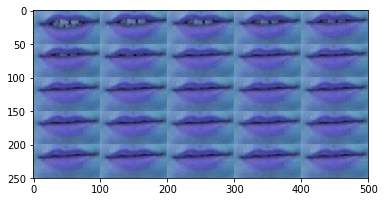

In [196]:
temp_paths = data_df[data_df.merged_idx==temp_root]['path'].sort_values("index",ascending=True)
n_path = len(temp_paths)

i_frame = 0 
temp_mat = []
for ii in range(5):
    temp_arr = []
    for i in range(5):
        if i_frame<n_path:
            print(temp_paths.iloc[i_frame])
            im1=cv2.imread(temp_paths.iloc[i_frame])
            i_frame+=1
        temp_arr.append(im1)
    temp_mat.append(temp_arr)
im_tile = concat_tile(temp_mat)
plt.imshow(im_tile)   

## Make Tile - Zero silence frames

In [199]:
temp_paths = data_df[data_df.merged_idx==temp_root]['path'].sort_values("index",ascending=True)
n_path = len(temp_paths)

i_frame = 0 
temp_mat = []
for ii in range(5):
    temp_arr = []
    for i in range(5):
        if i_frame<n_path:
            print(temp_paths.iloc[i_frame])
            im1=cv2.imread(temp_paths.iloc[i_frame])
            i_frame+=1
        elif i_frame==n_path:
            im1 = np.zeros_like(im1) 
            i_frame+=1
        temp_arr.append(im1)
    temp_mat.append(temp_arr)
im_tile = concat_tile(temp_mat)
plt.imshow(im_tile)   

In [213]:
dataset_dir = Path("Dataset")
os.mkdir("Dataset")

In [217]:
data_df['word'].unique()

array(['m', 's', 'white', 'please', 'bin', 'three', 'now', 'six', 'lay',
       'place', 'one', 'red', 'l', 'by', 'blue', 'soon', 'again', 'four',
       'green', 'nine', 'in', 'set', 'five', 'k', 'v', 'e', 'o', 'x', 'j',
       'zero', 'z', 'g', 'b', 'eight', 'with', 'c', 't', 'two', 'at', 'p',
       'n', 'y', 'seven', 'u', 'h', 'i', 'q', 'a', 'f', 'r', 'd'],
      dtype=object)

In [218]:
for x in data_df['word'].unique():
    print(x)
    os.mkdir(str(dataset_dir/x))

m
s
white
please
bin
three
now
six
lay
place
one
red
l
by
blue
soon
again
four
green
nine
in
set
five
k
v
e
o
x
j
zero
z
g
b
eight
with
c
t
two
at
p
n
y
seven
u
h
i
q
a
f
r
d


In [232]:
# temp_root + ".jpg"
temp_dataset['word'].iloc[0]

'soon'

In [250]:
new_df['out_path']= new_df.apply(lambda x:\
                                 str(dataset_dir/x["word"]/x["merged_idx"])+".jpg",axis=1)


In [252]:
new_df.to_csv("dataset_preproc_out.csv")

In [ ]:
# xx = 0
for temp_root in new_df['merged_idx'].unique():
######################debug######################
#     if xx>4: break
#     print(temp_root)
#     xx+=1
#################################################


    temp_paths = data_df[data_df.merged_idx==temp_root]['path']\
                    .sort_values("index",ascending=True)
######################debug############################################
#     temp_row = data_df[data_df.merged_idx==temp_root]
#######################################################################

    temp_word = data_df[data_df.merged_idx==temp_root]['word'].unique()[0]
    n_path = len(temp_paths)

    i_frame = 0 
    temp_mat = []
    for ii in range(5):
        temp_arr = []
        for i in range(5):
            if i_frame<n_path:
#                 print(temp_paths.iloc[i_frame])
                im1=cv2.imread(temp_paths.iloc[i_frame])
                i_frame+=1
            elif i_frame==n_path:
                im1 = np.zeros_like(im1) 
                i_frame+=1
            temp_arr.append(im1)
        temp_mat.append(temp_arr)
    im_tile = concat_tile(temp_mat)
#     plt.show()
#     plt.imshow(im_tile)   
    img_out = str(dataset_dir/temp_word/temp_root)
#     print(img_out)
    cv2.imwrite(img_out+".jpg",im_tile)

In [255]:
dataset_dir = Path("Dataset_Fill")
os.mkdir("Dataset_Fill")
for x in data_df['word'].unique():
    print(x)
    os.mkdir(str(dataset_dir/x))

m
s
white
please
bin
three
now
six
lay
place
one
red
l
by
blue
soon
again
four
green
nine
in
set
five
k
v
e
o
x
j
zero
z
g
b
eight
with
c
t
two
at
p
n
y
seven
u
h
i
q
a
f
r
d


In [ ]:
# xx = 0
for temp_root in new_df['merged_idx'].unique():
######################debug######################
#     if xx>4: break
#     print(temp_root)
#     xx+=1
#################################################


    temp_paths = data_df[data_df.merged_idx==temp_root]['path']\
                    .sort_values("index",ascending=True)
######################debug############################################
#     temp_row = data_df[data_df.merged_idx==temp_root]
#######################################################################

    temp_word = data_df[data_df.merged_idx==temp_root]['word'].unique()[0]
    n_path = len(temp_paths)

    i_frame = 0 
    temp_mat = []
    for ii in range(5):
        temp_arr = []
        for i in range(5):
            if i_frame<n_path:
#                 print(temp_paths.iloc[i_frame])
                im1=cv2.imread(temp_paths.iloc[i_frame])
                i_frame+=1
#             elif i_frame==n_path:
#                 im1 = np.zeros_like(im1) 
#                 i_frame+=1
            temp_arr.append(im1)
        temp_mat.append(temp_arr)
    im_tile = concat_tile(temp_mat)
#     plt.show()
#     plt.imshow(im_tile)   
    img_out = str(dataset_dir/temp_word/temp_root)
#     print(img_out)
    cv2.imwrite(img_out+".jpg",im_tile)

In [11]:
def load_data(path,num_word,times):
    labels = []
    inputs = []
    with open(path,'r') as f:
        lines = f.readlines()
        count = 0
        label_count = 0
        target_lines = lines[times*25*num_word:times*25*num_word+num_word*25]
        for i in target_lines:           
            #print(i)
            if(count>=(num_word*25)):
                break
            #temp = Image.open(i.strip('\n')).convert('L')
            temp = Image.open(i.strip('\n'))
            #image_t = np.array(temp)
            image_t = np.array(temp)
            inputs.append(image_t)
            temp.close()
            
            if((label_count == 0)|(label_count == 25)):
                label_count = 0
                all_string = i.split('/')
                #print(all_string[-1])
                #print(all_string)
                labels.append((all_string[-1]).split('_')[-2])
                #print(labels[-1])
            label_count += 1
            count += 1
            #print(all_string[-1])
    #print(labels)
    x = np.asarray(inputs, dtype = np.float32)
    #x = x/255.0
    return x,labels

## Fuse Grid

In [3]:
test_df = pd.read_csv("test_speech.csv")

In [10]:
data_df=pd.read_csv("test.sh")

In [11]:
data_df.head(1)

,cp m/s13_bwwm7a_m.jpg -t test/m
0,cp m/s10_pwam7s_m.jpg -t test/m


In [4]:
test_df.head()

,Unnamed: 0,cp,fname,t,folder,speaker,w_pattern,token,start,end
0,0,cp,m/s13_bwwm7a_m.jpg,-t,test/m,s13,bwwm7a,m,28250,33000
1,1,cp,m/s10_pwam7s_m.jpg,-t,test/m,s10,pwam7s,m,34000,44000
2,2,cp,m/s11_bwwm9a_m.jpg,-t,test/m,s11,bwwm9a,m,30500,34750
3,3,cp,m/s11_sram8n_m.jpg,-t,test/m,s11,sram8n,m,22500,27250
4,4,cp,m/s13_bgam5a_m.jpg,-t,test/m,s13,bgam5a,m,36000,41000


In [5]:
temp_row = test_df.iloc[10000]

In [8]:
t_path = pathlib.Path(".")

In [9]:
temp_row

Unnamed: 0                       10000
cp                                  cp
fname         soon/s11_brwz9s_soon.jpg
t                                   -t
folder                       test/soon
speaker                            s11
w_pattern                       brwz9s
token                             soon
start                            54750
end                              67000
Name: 10000, dtype: object

Dataset_Null/test/soon/s11_brwz9s_soon.jpg
speech_mel_noisy/test/soon/s11_brwz9s_soon.jpg


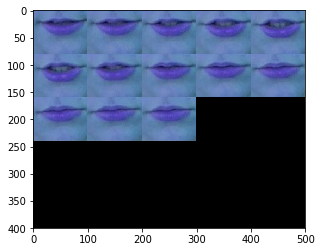

In [20]:
grid_path = t_path/"Dataset_Null"/"test"/temp_row['fname']
mel_spec = t_path/"speech_mel_noisy"/"test"/temp_row['fname']

print(str(grid_path))
print(str(mel_spec))
im1 = cv2.imread(str(grid_path))
plt.imshow(im1)   

In [ ]:
word_path = t_path/"speech_mel/"/temp_row['folder']/str(temp_row['speaker'] + '_' \
                     + temp_row['w_pattern'] + '_' + temp_row['token'] +".wav")
wav_path = t_path/"speech_mel/"/temp_row['folder']/str(temp_row['speaker'] + '_' \
                     + temp_row['w_pattern'] + '_' + temp_row['token'] +".jpg")